Otsu Algorithm

Optimal Threshold:  146


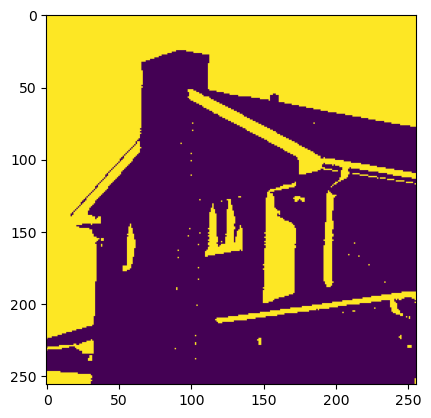

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_threshold_manual(image):
    # 1. 히스토그램 계산
    hist, _ = np.histogram(image.ravel(), 256, [0, 256])
    total_pixels = image.shape[0] * image.shape[1]

    # 2. 초기 조건 계산
    current_max = 0
    threshold = 0
    sum_total = 0
    for t in range(256):
        sum_total += t * hist[t]
        
    weight_bg = 0
    sum_bg = 0

    # 3. 임계값 찾기
    for t in range(256):
        weight_bg += hist[t]
        if weight_bg == 0:
            continue
        weight_fg = total_pixels - weight_bg
        if weight_fg == 0:
            break

        sum_bg += t * hist[t]
        mean_bg = sum_bg / weight_bg
        mean_fg = (sum_total - sum_bg) / weight_fg

        # Between class variance 계산
        var_between = weight_bg * weight_fg * (mean_bg - mean_fg) ** 2

        # 최적 임계값 업데이트
        if var_between > current_max:
            current_max = var_between
            threshold = t

    # 4. 이미지 이진화 (직접 픽셀 비교)
    binary_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] > threshold:
                binary_image[i, j] = 255
            else:
                binary_image[i, j] = 0
                
    return binary_image, threshold

imgae_path = './image/house.bmp'
# 테스트를 위해 이미지 읽기
image = cv2.imread(imgae_path, cv2.IMREAD_GRAYSCALE)
binary_image, threshold = otsu_threshold_manual(image)

# 결과 출력
print("Optimal Threshold: ", threshold)
plt.imshow(binary_image)
